In [1]:
#imports the required packages
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('netnaija_movie.csv')

In [3]:
df.head(2)

,Unnamed: 0,titles,movie_types,time_of_uplos,movie_lengths,num_of_comments,Genres,Release_Dates,Starss,Languages,Subtitles,movie_linkss,imdb_links,mo_summarys
0,0,Clean (2022),['Movies'],Jan 28,['01:33:27'],['56'],"[' Crime, Drama, Thriller']","Release Date: Jan 28, 2022 (United States)","[' Adrien Brody, Glenn Fleshler, Richie Merritt']",[' English'],[' English'],https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Revenge is a dirty business.</em>
1,1,The Ice Age Adventures of Buck Wild (2022),['Movies'],Jan 28,['01:21:05'],['81'],"[' Adventure, Animation, Comedy, Family']","Release Date: Jan 28, 2022 (United States)","[' Simon Pegg, Vincent Tong, Aaron Harris']",[' English'],[' English'],https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Disney+ gets wild.</em>


In [4]:
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 3073
number of columns are: 14


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3073 non-null   int64 
 1   titles           3073 non-null   object
 2   movie_types      3073 non-null   object
 3   time_of_uplos    3073 non-null   object
 4   movie_lengths    3073 non-null   object
 5   num_of_comments  3073 non-null   object
 6   Genres           3073 non-null   object
 7   Release_Dates    3073 non-null   object
 8   Starss           3073 non-null   object
 9   Languages        3073 non-null   object
 10  Subtitles        3073 non-null   object
 11  movie_linkss     3073 non-null   object
 12  imdb_links       3073 non-null   object
 13  mo_summarys      3073 non-null   object
dtypes: int64(1), object(13)
memory usage: 336.2+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'titles', 'movie_types', 'time_of_uplos', 'movie_lengths',
       'num_of_comments', 'Genres', 'Release_Dates', 'Starss', 'Languages',
       'Subtitles', 'movie_linkss', 'imdb_links', 'mo_summarys'],
      dtype='object')

In [7]:
df=df.rename(columns={
    'time_of_uplos':'Upload_date',
    'movie_lengths':'Movie_length',
    'titles':'Title',
    'movie_types':'Movie_type',
    'Genres':'Genres',
    'Release_Dates':'Release_date',
    'Starss':'Stars',
    'num_of_comments':'Num_of_comments',
    'Languages':'Language',
    'Subtitles':'Subtitle',
    'movie_linkss':'Movie_link',
    'imdb_links':'Imdb_link', 
    'mo_summarys':'Movie_summary'
    })

In [8]:
def rmbracket(columns): # defining a function
    columns=columns.str.replace('[',' ')
    columns=columns.str.replace(']',' ')
    columns=columns.str.replace('\'',' ')
    return columns

In [9]:
# Removes brackets and apostrophies in below columns

df['Title']=rmbracket(df['Title'])
df['Movie_type']=rmbracket(df['Movie_type'])
df['Movie_length']=rmbracket(df['Movie_length'])
df['Num_of_comments']=rmbracket(df['Num_of_comments'])
df['Genres']=rmbracket(df['Genres'])
df['Stars']=rmbracket(df['Stars'])
df['Language']=rmbracket(df['Language'])
df['Subtitle']=rmbracket(df['Subtitle'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3073 non-null   int64 
 1   Title            3073 non-null   object
 2   Movie_type       3073 non-null   object
 3   Upload_date      3073 non-null   object
 4   Movie_length     3073 non-null   object
 5   Num_of_comments  3073 non-null   object
 6   Genres           3073 non-null   object
 7   Release_date     3073 non-null   object
 8   Stars            3073 non-null   object
 9   Language         3073 non-null   object
 10  Subtitle         3073 non-null   object
 11  Movie_link       3073 non-null   object
 12  Imdb_link        3073 non-null   object
 13  Movie_summary    3073 non-null   object
dtypes: int64(1), object(13)
memory usage: 336.2+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3073 non-null   int64 
 1   Title            3073 non-null   object
 2   Movie_type       3073 non-null   object
 3   Upload_date      3073 non-null   object
 4   Movie_length     3073 non-null   object
 5   Num_of_comments  3073 non-null   object
 6   Genres           3073 non-null   object
 7   Release_date     3073 non-null   object
 8   Stars            3073 non-null   object
 9   Language         3073 non-null   object
 10  Subtitle         3073 non-null   object
 11  Movie_link       3073 non-null   object
 12  Imdb_link        3073 non-null   object
 13  Movie_summary    3073 non-null   object
dtypes: int64(1), object(13)
memory usage: 336.2+ KB


In [12]:
x=df['Title'].str.findall('(\d{4})')#new columns for year

Year = []
for i in x:
    try:
        Year.append(i[-1])
    except:
        Year.append(np.nan)
        
df['Year']=Year    

In [13]:
y=df['Upload_date'].str.split(',')

month_day = []
for i in y:
    try:
        month_day.append(f'{i[0]} ')
    except:
        month_day.append(np.nan)
        
df['Month_day']=month_day

In [14]:
df['Upload_date'] = df['Month_day'] + df['Year'] 

In [15]:
df['Upload_date']=pd.to_datetime(df['Upload_date'])

In [16]:
df.head(4)

,Unnamed: 0,Title,Movie_type,Upload_date,Movie_length,Num_of_comments,Genres,Release_date,Stars,Language,Subtitle,Movie_link,Imdb_link,Movie_summary,Year,Month_day
0,0,Clean (2022),Movies,2022-01-28,01:33:27,56,"Crime, Drama, Thriller","Release Date: Jan 28, 2022 (United States)","Adrien Brody, Glenn Fleshler, Richie Merritt",English,English,https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Revenge is a dirty business.</em>,2022,Jan 28
1,1,The Ice Age Adventures of Buck Wild (2022),Movies,2022-01-28,01:21:05,81,"Adventure, Animation, Comedy, Family","Release Date: Jan 28, 2022 (United States)","Simon Pegg, Vincent Tong, Aaron Harris",English,English,https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Disney+ gets wild.</em>,2022,Jan 28
2,2,In the Forest (2022),Movies,2022-01-28,01:23:11,39,"Horror, Thriller","Release Date: Jan 28, 2022 (United States)","Debbon Ayer, Cristina Spruell, Lyman Ward",English,English,https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,Helen and her daughter Emily reluctantly accom...,2022,Jan 28
3,3,Twice Bitten (2021),Movies,2021-01-28,01:28:07,18,"Jul 11, 2021 (United States)","Stars: LisaRaye McCoy, Ledisi, Kevin A. Walton...",Twice.Bitten.2021.1080p.AMZN.WEBRip.DDP2.0....,English,"https , //www.imdb.com/title/tt14191916/",https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,An unmitigated and sexy conman targets his nex...,2021,Jan 28


In [17]:
df['Movie_length']=pd.to_timedelta(df['Movie_length'], errors ='coerce',)

In [18]:
df.isnull().sum()

Unnamed: 0         0
Title              0
Movie_type         0
Upload_date        4
Movie_length       1
Num_of_comments    0
Genres             0
Release_date       0
Stars              0
Language           0
Subtitle           0
Movie_link         0
Imdb_link          0
Movie_summary      0
Year               4
Month_day          0
dtype: int64

In [19]:
df=df.dropna()

In [20]:
df=df.drop('Unnamed: 0', axis=1)

In [21]:
df=df.set_index('Upload_date')

In [22]:
df['Num_of_comments']=df['Num_of_comments'].astype(int) 

## Exploratory Data analysis

**Questions**
- Which year has the highest number of upload?
- Find the number of movies by month in the year 2019
- What movies has highest movie length?
- Find movies which Jason Statham acted
- compared number of movies with gnere horror and animation using a Piechart
- show the distribution of comment using a Histograph

In [23]:
df.head(2)

,Title,Movie_type,Movie_length,Num_of_comments,Genres,Release_date,Stars,Language,Subtitle,Movie_link,Imdb_link,Movie_summary,Year,Month_day
Upload_date,,,,,,,,,,,,,,
2022-01-28,Clean (2022),Movies,0 days 01:33:27,56,"Crime, Drama, Thriller","Release Date: Jan 28, 2022 (United States)","Adrien Brody, Glenn Fleshler, Richie Merritt",English,English,https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Revenge is a dirty business.</em>,2022,Jan 28
2022-01-28,The Ice Age Adventures of Buck Wild (2022),Movies,0 days 01:21:05,81,"Adventure, Animation, Comedy, Family","Release Date: Jan 28, 2022 (United States)","Simon Pegg, Vincent Tong, Aaron Harris",English,English,https://www.thenetnaija.co/videos/movies,https://www.secure.zabira.ng/register?utm_sour...,<em>Disney+ gets wild.</em>,2022,Jan 28


## Which year has the highest number of upload?

In [24]:
x=df['Year'].value_counts()

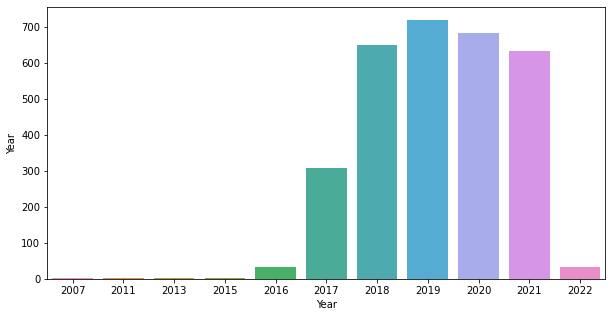

In [25]:
fig = plt.figure(figsize=(10,5))
order = sorted(list(x.index))
plt.ylabel('Counts')
plt.xlabel('Year')
sns.barplot(x=x.index, y=x, order=order );

## Find the number of movies by month in the year 2019

In [26]:
df_2019= df[df['Year']=='2019']
count_2019=df_2019.resample('M').count()['Title']

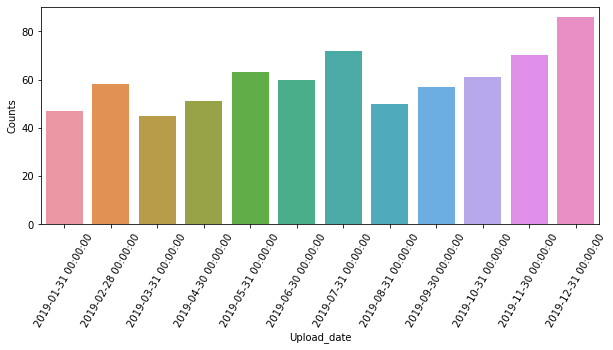

In [27]:
fig = plt.figure(figsize=(10,4))
plt.ylabel('Counts')
sns.barplot(x=count_2019.index, y=count_2019.values )
plt.xticks(rotation=60);

## What movies has highest movie length?

In [28]:
df[df['Movie_length']==str(df['Movie_length'].max())][['Title','Movie_length']]

,Title,Movie_length
Upload_date,,
2021-03-18,Zack Snyder s Justice League (2021),0 days 04:02:03


## Find movies which Jason Statham stared in

In [29]:
df[df['Stars'].str.contains('Jason Statham')][['Title','Genres']]

,Title,Genres
Upload_date,,
2021-05-25,Wrath of Man (2021),"Action, Crime, Thriller"
2019-08-06,Fast & Furious Presents: Hobbs & Shaw (2019),"Action, Adventure"
2018-09-16,The Meg (2018),"Action, Horror, Sci-Fi, Thriller"


## Show Percentage Representation of Action, Drama, Romance, Comedy and Thriller genres in pie_graph

In [30]:
Action=df['Genres'].str.contains('Action').sum()
Drama=df['Genres'].str.contains('Drama').sum()
Romance =df['Genres'].str.contains('Romance ').sum()
Comedy=Animation=df['Genres'].str.contains('Comedy').sum()
Thriller=Animation=df['Genres'].str.contains('Thriller').sum()
geners =[Action, Drama, Romance, Comedy, Thriller]

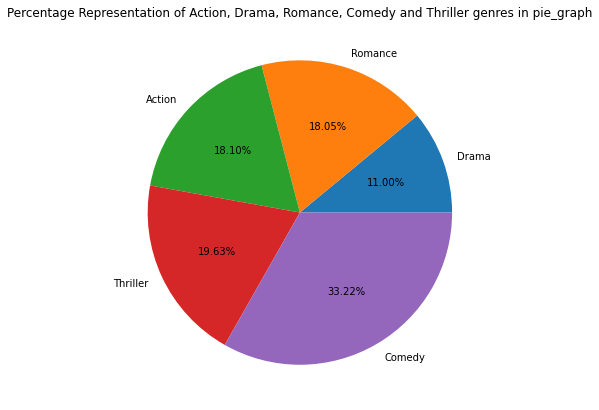

In [31]:

plt.figure(figsize = (7,7))
plt.title(f'Percentage Representation of Action, Drama, Romance, Comedy and Thriller genres in pie_graph')

plt.pie(sorted(geners), labels = {'Romance', 'Thriller' ,'Action', 'Comedy',  'Drama'}, autopct = '%1.2f%%');

## Show the trend in number of uploads per month

In [32]:
monthly_resample=df.resample('M').count()['Title']

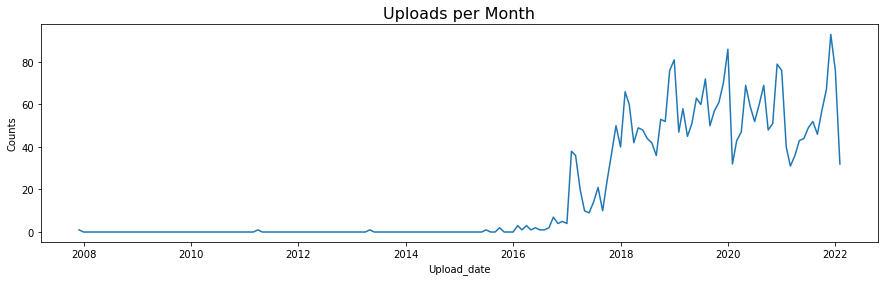

In [33]:
plt.figure(figsize=(15,4))
plt.title('Uploads per Month', fontsize=16,)
plt.ylabel('Counts')
sns.lineplot(x=monthly_resample.index, y=monthly_resample);